# Resumes & The Job Application Process

An increasing number of companies these days are using [Applicant Tracking Systems](https://en.wikipedia.org/wiki/Applicant_tracking_system) some popular examples (at the time of writing) being [lever](https://www.lever.co/) & [greenhouse](https://grow.greenhouse.io)

Many of these provide aggegrate summary views of candidates and job description fit based on keyword analysis and other techniques to aid in pre-screening, in a classic cat & mouse game there are now services where candidates can optimize their resumes against a job description specifically to game these systems such as [skillsyncer](https://skillsyncer.com/)

This jupyter notebook is a light hearted analysis of my resume, there are an exhaustive number of services that can do this far more thoroughly if you want to get serious about it

I used [pandoc](https://pandoc.org/) to convert my resume from latex to text eg.

```bash
$ pandoc Resume-ClintPlummer_ENMR-2020.tex -o Resume_ClintPlummer_ENMR-2020.txt
```

## Word Cloud

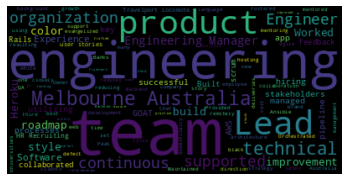

In [22]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

file_handle = open('./Resume_ClintPlummer_ENMR.txt', 'r')

word_cloud = WordCloud().generate(file_handle.read())

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()





## Title Frequency Distribution

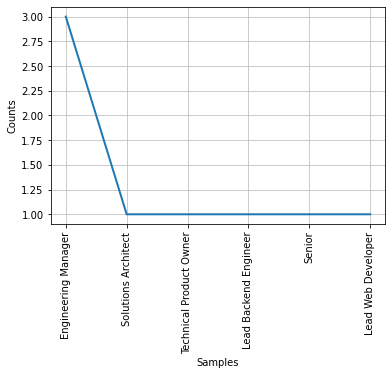

In [38]:
from TexSoup import TexSoup
from TexSoup.data import RArg
import nltk

file_handle = open('./Resume_ClintPlummer_ENMR.tex','r')

soup = TexSoup(file_handle)

# FIXME: This is fragile and unefficient, refactor to find the experience section
# eg. soup.find('cvsect', args = [RArg('Experience')])
experience_section = list(soup.find_all('cvsect'))[1]
titles = []

for entry in experience_section.entrylist.find_all('entry'):
    date_location, title, company, achievements = entry.args
    
    [titles.append(t.strip()) for t in title.value.split('/')]
    
    #for t in title.value.split('/'):
     #   titles.append(t.strip())
    #titles.append()
    #print(company.value)
    #print(achievements.value.strip().split("\\par\medskip"))


freq = nltk.FreqDist(titles)
freq.plot(20, cumulative=False)